In [4]:
import matplotlib.pyplot as plt
import numpy as np
import qiskit
from qoop.core.ansatz import WchainCNOT_xyz
num_qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10]
depths_qiskit = []
depths_compilation = []
for num_qubit in num_qubits:
    y = np.random.rand(2**num_qubit)
    y = y / np.linalg.norm(y)
    qc = qiskit.QuantumCircuit(num_qubit)
    qc.prepare_state(y)
    qc_transpiled = qiskit.transpile(qc, basis_gates = ['h', 'cx', 'rx', 'ry', 'rz'],  optimization_level=3)
    depths_qiskit.append(qc_transpiled.depth())
    qc_compilation = WchainCNOT_xyz(num_qubit, num_qubit)
    depths_compilation.append(qc_compilation.depth())

In [15]:
print(depths_compilation)
print(depths_qiskit)

[10, 18, 28, 40, 54, 70, 88, 108, 130]
[4, 13, 29, 62, 129, 284, 589, 1385, 3064]


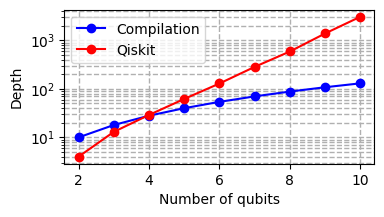

In [16]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(num_qubits, depths_compilation, color = 'blue', marker='o', label='Compilation')
ax.plot(num_qubits, depths_qiskit, color = 'red', marker='o', label='Qiskit')
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Depth')
ax.grid(True, which='both', linestyle='--', linewidth=1)
ax.set_yscale('log')
ax.legend()
plt.savefig('./images/depths_compilation_vs_qiskit.pdf', bbox_inches='tight')